In [1]:
# Step 1: Importing required libraries

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, classification_report

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

>Here in the above cell we are importing all the necessary packages that we require in our program.

In [3]:
# Step 2: Import Required Dataset
suv_data=pd.read_csv("datasets/suv_data.csv")

### `.read_csv()`
> `read_csv()` is a function defined in the pandas library that facilitates us to read csv files.

Here we are using this function to read our datatset which is contained in `iris.csv` file

In [41]:
suv_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### `.head()`
> `head()` function is defined in the pandas library.<p>
The syntax for `.head` is `.head(n)`

This function takes integer value as input. By default the value of `n=5`<p>
This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [7]:
suv_data_final=suv_data[["Age","EstimatedSalary","Purchased"]]

In [8]:
suv_data_final

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


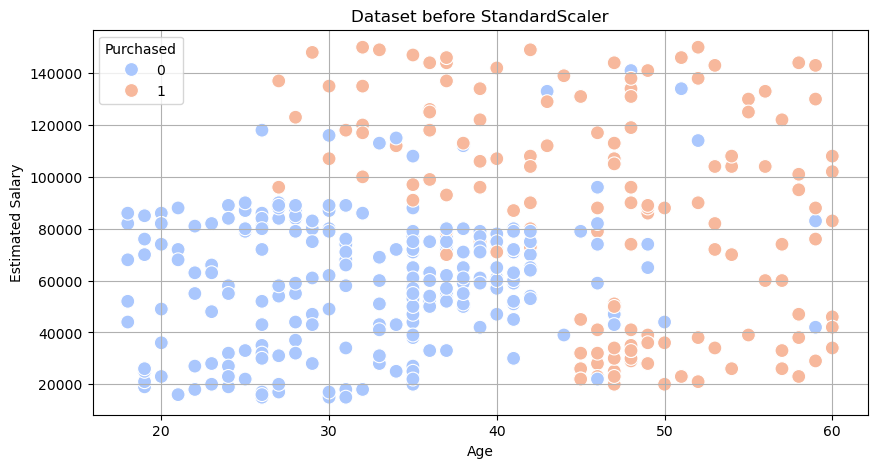

In [9]:
# Step 3: Plotting the dataset before scaling
plt.figure(figsize=(10, 5))
sns.scatterplot(data=suv_data_final, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm', s=100)
plt.title('Dataset before StandardScaler')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.grid()
plt.show()

Text(0, 0.5, 'Age')

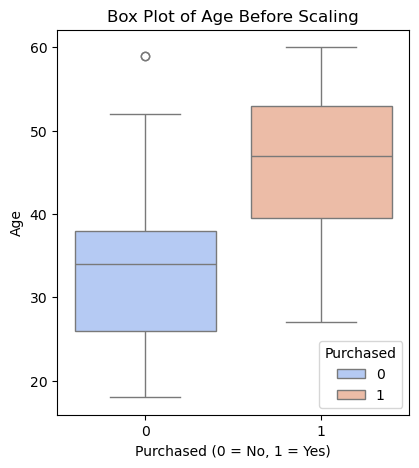

In [10]:
# Step 3:(Cont.) Box Plots to compare distributions before and after scaling
plt.figure(figsize=(10, 5))
# Box plot for Age before scaling
plt.subplot(1, 2, 1)
sns.boxplot(x='Purchased', y='Age', data=suv_data_final, hue="Purchased", palette='coolwarm')
plt.title('Box Plot of Age Before Scaling')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Age')

In [11]:
# Step 4: Applying StandardScaler
scaler = StandardScaler()
X = suv_data_final[['Age', 'EstimatedSalary']]
X_scaled = scaler.fit_transform(X)

### StandardScaler() function
> `StadardScaler()` function is defined in *scikit-learn* library<p>
> This function Standardize features by removing the mean and scaling to unit variance.</p>

> Syntax for `StadardScaler()` is given by : <p>
>**`StandardScaler(*, copy=True, with_mean=True, with_std=True)`**

<p> Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed. StandardScaler is one of the scikit-learn method to preprocess data for machine learning.</p>

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 
StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because *variance = standard deviation squared*. And 1 squared = 1.</p>

<p> StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.
Deep learning algorithms often call for zero mean and unit variance. Regression-type algorithms also benefit from normally distributed data with small sample sizes.</p>

>**The standard score of a sample x is calculated as:**

> $$ z = {x - μ \over σ} $$

>Where $ μ $ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`.

**`.fit()`** is one of the method provided by StandardScaler function.<p>
This method Computes the mean and std to be used for later scaling.
Syntax of `fit()` method is given by:</p>
>**`.fit(X, y=None, sample_weight=None)`**

The following is the decription of parameters that are taken by `.fit()` method:
- **x** = An input or data used to compute the mean and standard deviation used for later scaling along the features axis.
<p>
- **y** = Ignored
</p>
<p>
- **sample_weight** = Here we can secify the individual weights for each sample. By default its value is None
</p>

**`.transform()`** is another method which is provided by StandardScaler function.<p>
This method Perform standardization by centering and scaling by using thevalues computed by `.fit()` function.
Syntax of `transform()` method is given by:</p>
>**`.transform(X, copy=None)`**

The following is the decription of parameters that are taken by `.fit()` method:
- **x** = An input or data used to scale along the features axis.
<p>
- **copy** = Copy the input X or not.
</p>

In [12]:
# Step 5: Creating a new DataFrame for scaled data
suv_scaled_data = pd.DataFrame(X_scaled, columns=['Age', 'EstimatedSalary'])
suv_scaled_data['Purchased'] = suv_data_final['Purchased']

In [13]:
suv_scaled_data

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


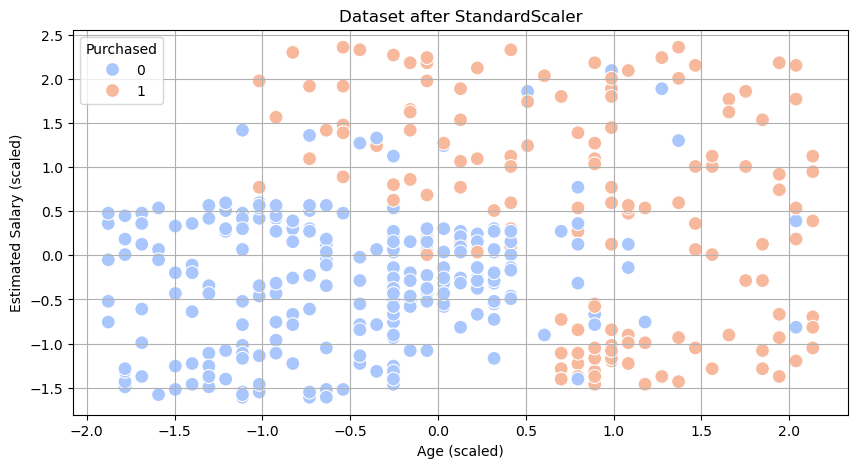

In [14]:
# Step 6: Plotting the dataset after scaling
plt.figure(figsize=(10, 5))
sns.scatterplot(data=suv_scaled_data, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm', s=100)
plt.title('Dataset after StandardScaler')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.grid()
plt.show()

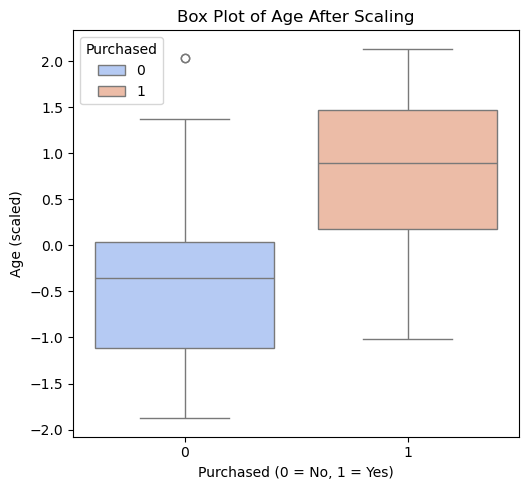

In [16]:
# Step 6: (Cont.) Box plot for Age after scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='Purchased', y='Age', data=suv_scaled_data, hue='Purchased', palette='coolwarm')
plt.title('Box Plot of Age After Scaling')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Age (scaled)')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

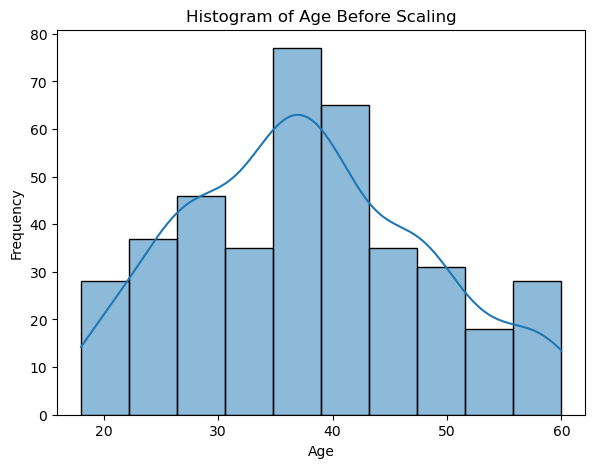

In [17]:
# Step 6: (Cont.) Histograms to compare distributions before and after scaling
# Histogram for Age before scaling
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(suv_data_final['Age'], bins=10, kde=True)
plt.title('Histogram of Age Before Scaling')
plt.xlabel('Age')
plt.ylabel('Frequency')

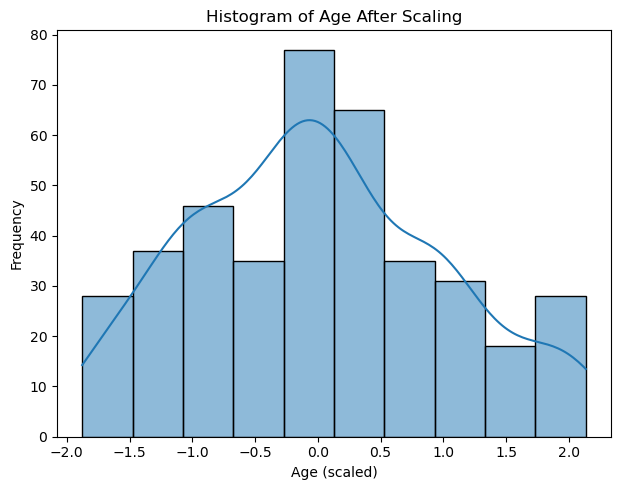

In [18]:
# Step 6: (Cont.) Histogram for Age after scaling
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(suv_scaled_data['Age'], bins=10, kde=True)
plt.title('Histogram of Age After Scaling')
plt.xlabel('Age (scaled)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Age (scaled)')

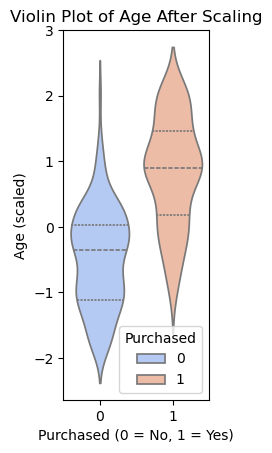

In [20]:
# Step 6: (Cont.) Violin plot for Age after scaling
plt.subplot(1, 3, 3)
sns.violinplot(x='Purchased', y='Age', data=suv_scaled_data, palette='coolwarm', hue ='Purchased', inner='quartile')
plt.title('Violin Plot of Age After Scaling')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Age (scaled)')

Text(0, 0.5, 'Age (Not scaled)')

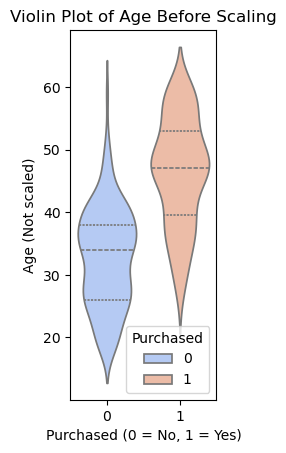

In [21]:
# Step 6: (Cont.) Violin plot for Age Before scaling
plt.subplot(1, 3, 3)
sns.violinplot(x='Purchased', y='Age', data=suv_data_final, palette='coolwarm', hue ='Purchased', inner='quartile')
plt.title('Violin Plot of Age Before Scaling')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Age (Not scaled)')

Text(0, 0.5, 'Income (Not scaled)')

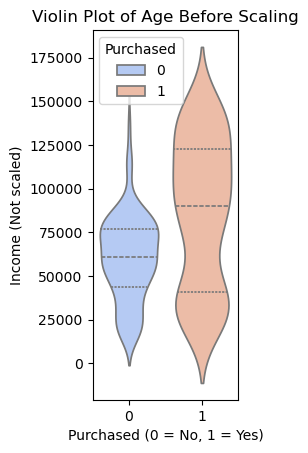

In [22]:
# Step 6: (Cont.) Violin plot for Income Before scaling
plt.subplot(1, 3, 3)
sns.violinplot(x='Purchased', y='EstimatedSalary', data=suv_data_final, palette='coolwarm', hue ='Purchased', inner='quartile')
plt.title('Violin Plot of Age Before Scaling')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Income (Not scaled)')

Text(0, 0.5, 'Income (scaled)')

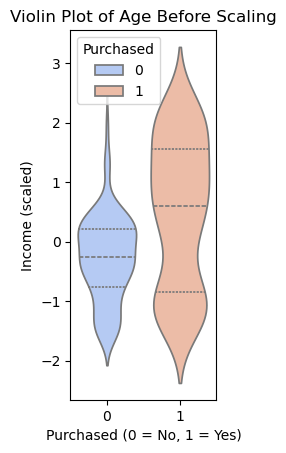

In [23]:
# Step 6: (Cont.) Violin plot for Income After scaling
plt.subplot(1, 3, 3)
sns.violinplot(x='Purchased', y='EstimatedSalary', data=suv_scaled_data, palette='coolwarm', hue ='Purchased', inner='quartile')
plt.title('Violin Plot of Age Before Scaling')
plt.xlabel('Purchased (0 = No, 1 = Yes)')
plt.ylabel('Income (scaled)')

In [31]:
# Step 7: Features and target variable
x = suv_scaled_data.iloc[:, 0:2]
y = suv_scaled_data.iloc[:, 2]

#### `.iloc[ ]`  function
It is defined in pandas library.
This .iloc function helps us to index the dataframe or dataset using index postions.
The syntax of .iloc functiond id `.iloc(rows,columns)`
Here we are have sepcified `.iloc[:,0:2]` this means that... we are selecting all the rows present in out dataset/dataframe(suv_scaled_data dataframe here) and out of all the colums that are present in out dataset/dataframe we are only selecting 1st and 2nd column. As we can see here we are specifying columns [0:2]... so why the column with index 2 is not taken because python doesnot include the last specified index and only first row with index of 0 and 2nd row with index 1 is included.

In [32]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [34]:
# Step 8: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### train_test_split() function 
> `train_test_split()` function is defined in Scikit-Learn library.<p>
> `train_test_split()` function helps in Spliting arrays or matrices into random train and test subsets.

The following is the syntax for `tarin_test_split`<p>
> **`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None`**

The following is the decription of arguments that are taken by `train_test_split()` function:
- **arrays** = An input array/series : x,y
<p>
- **test_size** = The value should be between 0 to 1.0 which can be used to represent the proportion of data we want to include in testing data. For example- As we can see here we have mentioned test_size = 0.2, this means that we are considering 20% of our data under test_size.
</p>
<p>
- **train_size** = By default it is None as it adjusts according to test_size. Value is between 0 and 1.0. we have to only define this parameter if we are not defining test_size parameter.As we can see here that we have not defied trin_size, so here it will be automatically adjusted and it will be 80% of our data as here we have considered 20% of our data for train_size.
</p>
<p>
- **random_state** = Here we pass an integer, which will act as the seed for the random number generator during the split. Or, we can also pass an instance of the RandomState class, which will become the number generator. If we don’t pass anything, the RandomState instance used by np.random will be used instead. Also, if we pass any random number here then the `train_test_split()` function will generate exactly the same outputs every single time we run this function, given that we assigned the same number to Random_state. If you want your results to be stochastic(different) each time, simply leave it as the default value “None”.
</p>
<p>
- **shuffle** = By default it is True , this is used to specify if we want to shuffle the data before splitting. If shuffle is False , then stratify must be None.
</p>
<p>
- **stratify** = By default it is None , stratify means array like.
</p>


In [35]:
# Step 9: Creating Instance Of KNN Classifier 
KNearestNeighbourClassifier = KNeighborsClassifier()

In [36]:
# Step 10: Training the KNN Classifier
KNearestNeighbourTrainedClassifier = KNearestNeighbourClassifier.fit(x_train, y_train)

In [37]:
# Step 11: Make predictions
y_pred = KNearestNeighbourTrainedClassifier.predict(x_test)

In the above cell we are using **KNeighboursClassifier** to classify our given data.

Here, firstly we are training our KNeighborsClassifier on the training data and then we are testing the performance of trained model using test dataset.Here we are using the KNeighborsClassifier implementation that is provided by *Scikit-Learn* library via **`KNeighborsClassifier()`** function.

>**K-nearest neighbors (KNN)** is a type of supervised learning algorithm used for both regression and classification. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data. The KNN algorithm calculates the probability of the test data belonging to the classes of ‘K’ training data and class holds the highest probability will be selected. In the case of regression, the value is the mean of the ‘K’ selected training points.

|![KNeighborsClassifier](Lecture%20Notes/Lecture%20Images/knn_explaination_steps.webp)|
|:--:|
|[*Source: https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4*](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4)|

> Syntax for `KNeighborsClassifier()` is given by : <p>
>**`KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`**

The following is the decription of arguments that are taken by `KNeighborsClassifier()` function:
- **`n_neighbors`** = Here we pass an integer value that specify the number of neighbors we want to use for kneighbors queries. The default value for n_neighbour is 5. Here in our program we have specified the value of `n_neighbors = 7`.
  
- **`weight`** = The weight function is used in prediction. The following are the possible values for weight parameter:
    
    - `unifom` = This means uniform weights where all points in each neighborhood are weighted equally. The *uniform* is also the *default value* for the weight parameter when we have not specified any value.<p>
    
   - `distance` = weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.<p>
    
    - `[callable]` = we can also specify the value of weight parameter to be a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
</p>

- **algorithm** = Here we specify the algorithm that we want to use for computing the nearest neighbors. The following are the possible values(algorithms) for algorithm parameter:
    
    - `ball_tree` = This specifies that `KNeighborsClassifier()` will use BallTree algortihm for computing the nearest neighbors.<p>
        > **Ball Tree**: Ball trees are similar to KDTree as it also hierarchical data structure. These are very efficient specially in case of higher dimensions.
        - Two clusters are created initially<p>
        - All the data points must belong to atleast one of the clusters.<p>
        - One point cannot be in both clusters.<p>
        - Distance of the point is calculated from the centroid of the each cluster. The point closer to the centroid goes into that particular cluster.<p>
        - Each cluster is then divided into sub clusters again, and then the points are classified into each cluster on the basis of distance from centroid.<p>
        - This is how the clusters are kept to be divided till a certain depth.
            
|![Ball tree](Lecture%20Notes/Lecture%20Images/Ball_Tree.webp)|
|:--:|
|[*Source: https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4*](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4) |
        

The final resulting Ball tree as follows:
            
| ![BallTree example](Lecture%20Notes/Lecture%20Images/Final_Ball_Tree_Graph.webp) |
|:--:|
|[*Source: https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4*](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4) |       
            
   
   - `kd_tree` = This specifies that `KNeighborsClassifier()` will use KDTree algortihm for computing the nearest neighbors.<p>
> **k-Dimensional Tree (kd tree)** : k-d tree is a hierarchical binary tree. When this algorithm is used for k-NN classficaition, it rearranges the whole dataset in a binary tree structure, so that when test data is provided, it would give out the result by traversing through the tree, which takes less time than brute search.
        
| ![KDTree](Lecture%20Notes/Lecture%20Images/KD_Tree.webp) |
|:--:|
|[*Source: https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4*](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4) |

   - `brute` = This specifies that `KNeighborsClassifier()` will use brute-force search algortihm for computing the nearest neighbors.<p>
        > **Brute Force**: Lets consider for simple case with two dimension plot. If we look mathematically, the simple intuition is to calculate the euclidean distance from point of interest ( of whose class we need to determine) to all the points in training set. Then we take class with majority points. This is called brute force method.
    -`auto` = This specifies that `KNeighborsClassifier()` will attempt to decide the most appropriate algorithm based on the values passed to `fit()` method for computing the nearest neighbors. This is also the default value for `algorithm` parameter if we have not specified any algorithm.<p>
</p>
<p>

- **leaf_size** = Here we pass an integer, which will specify the Leaf size  that is passed to BallTree or KDTree algorithm. This leaf size can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem. the *default value* for `leaf_size = 30`.
</p>
<p>
- **p** = Here we pass an integr, which specifies the Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used. By default that value of `p = 2` , 
</p>
<p>
- **metric** = Here we pass an string or a callable function. This parameter specifies the metric to use for distance computation. The Default value for this  paramter is “minkowski”, which results in the standard Euclidean distance when p = 2. 

    If metric is “precomputed”, X is assumed to be a distance matrix and must be square during fit. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors.
    
    If metric is a callable function, it takes two arrays representing 1D vectors as inputs and must return one value indicating the distance between those vectors. This works for Scipy’s metrics, but is less efficient than passing the metric name as a string.
</p>

- **metric_params** = Here we pass an dictionary (dict), which will specify the additional keyword arguments for the metric function. The default value of this paprameter is None.

- **n_jobs** = Here we pass an integer value, which will specify the number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. Here the default value for `n_jobs` is None.


In [38]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [39]:
y_test

209    0
280    1
33     0
210    1
93     0
      ..
246    0
227    1
369    1
176    0
289    1
Name: Purchased, Length: 80, dtype: int64

In [54]:
# Step 12: Evaluate the model
print('Training data accuracy {:.2f}'.format(KNearestNeighbourTrainedClassifier.score(x_train, y_train)*100))
print('Testing data accuracy {:.2f}'.format(KNearestNeighbourTrainedClassifier.score(x_test, y_test)*100))

Training data accuracy 90.94
Testing data accuracy 92.50


In [41]:
# Step 12: (Cont.) Evaluate the model using Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[48  4]
 [ 2 26]]


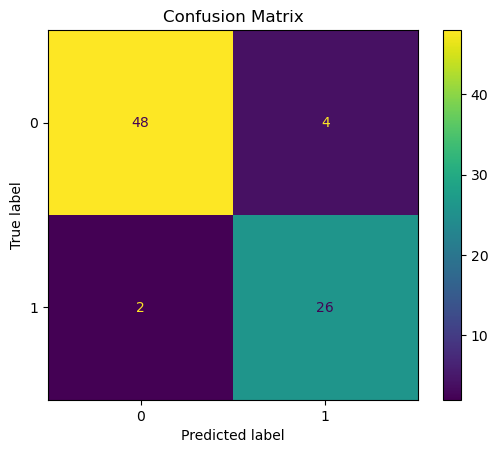

In [42]:
# Step 12: (Cont.) Displaying Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Step 12: (Cont.) Evaluate the model Using Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



X_set shape: (320, 2), y_set shape: (320,)
X_set dtype: float64, y_set dtype: int64


/home/tavneet/documents/data_science_lab_practicals/data_science_lab_env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


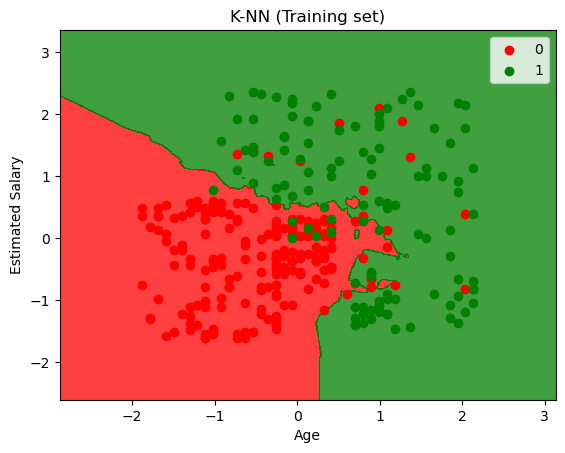

In [44]:
# Step 12: (Cont.) Visualizing the Training set results
from matplotlib.colors import ListedColormap

# Ensure X_set is a numpy array
X_set = np.array(x_train)
y_set = np.array(y_train)

# Verify data shapes and types
print(f"X_set shape: {X_set.shape}, y_set shape: {y_set.shape}")
print(f"X_set dtype: {X_set.dtype}, y_set dtype: {y_set.dtype}")

# Create meshgrid for the decision boundary
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predict class for each point in the meshgrid
Z = KNearestNeighbourTrainedClassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plotting the results
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter plot of data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


/home/tavneet/documents/data_science_lab_practicals/data_science_lab_env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


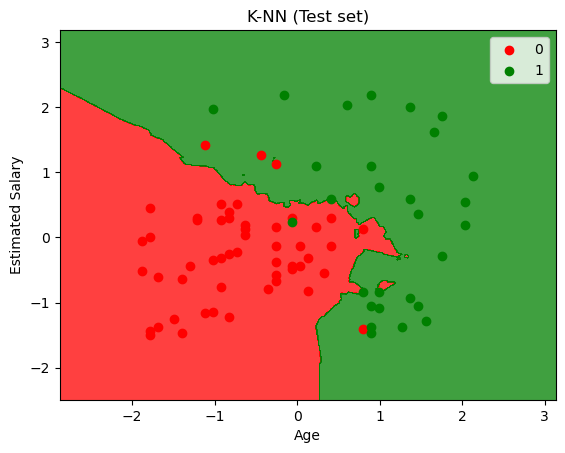

In [45]:
# Step 12: (Cont.) Visualizing the Test set results
# Ensure X_set is a numpy array
x_test_set = np.array(x_test)
y_test_set = np.array(y_test)

X1, X2 = np.meshgrid(np.arange(start=x_test_set[:, 0].min() - 1, stop=x_test_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_test_set[:, 1].min() - 1, stop=x_test_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, KNearestNeighbourTrainedClassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_test_set)):
    plt.scatter(x_test_set[y_test_set == j, 0], x_test_set[y_test_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

/home/tavneet/documents/data_science_lab_practicals/data_science_lab_env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


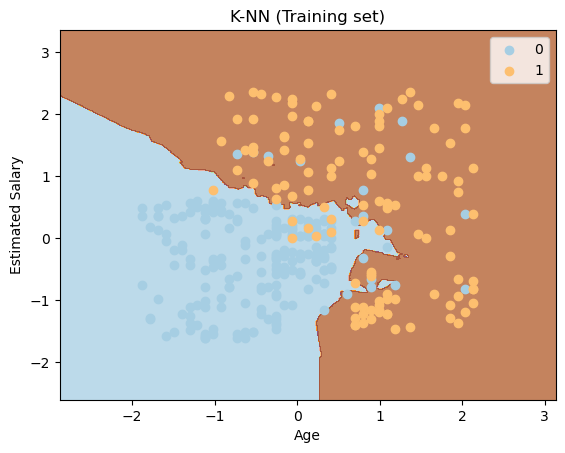

In [46]:
# Step 12: (Cont.) Visualize the results (optional)
def plot_decision_boundary(X, y, classifier, title):
    #X_set, y_set = X, y
   
    X_set = np.array(X)
    y_test_set = np.array(y)
    
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=plt.cm.Paired)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                     c=[plt.cm.Paired(i / float(len(np.unique(y_set))))], label=j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()
    
plot_decision_boundary(x_train, y_train, KNearestNeighbourTrainedClassifier, 'K-NN (Training set)')
